In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Требуется решить методом Эйлера задачу Коши:

$$\begin{cases}
\dfrac{d^2 u}{dt^2} + u = 0 \\
u(t=0) = u_0 = 1 \\
\dot{u}(t=0) = v_0 = 0
\end{cases}$$

на отрезке $t \in [0,20]$

Рассмотреть 3 варианта интегрирования:

1) на границе устойчивости схемы;

2) шаг в два раза меньше предыдущего;

3) шаг в 5 раз меньше границы устойчивости.

Для расчета значений функций в следующем за начальным узлом сетки используйте:

1) точное решение;  

2) один шаг по схеме Эйлера;

3) схему Эйлера с шагом в 2 раза меньше шага основной сетки.

Найдём точное решение.
$$ u(t)=\cos(t)$$
Нашли

Сделав замену $v=\dot{u}$, получим систему уравнений:

$$\begin{cases}
\dfrac{dv}{dt} = -u \\
\dfrac{du}{dt} = v \\
u(0) = 1\\
v(0) = 0
\end{cases}$$


Решение будем искать двухслойным методом Эйлера с перешагиванием. Разностная схема уравнений записывается в виде:
$$\begin{cases}
u_{i+2}=u_{i} + v_{i+1}2\Delta t \\
v_{i+2}=v_{i} + f_{i+1}2\Delta t
\end{cases}$$

Для рассчёта $u_1, v_1$ по заданию предлагается воспользоваться 3мя методами:

1) Точное решение: $v_{1}=v(\Delta t) = -\sin(\Delta t)$

2) Один шаг по схеме Эйлера: $u_1 = u_0 + v_0\Delta t=u_0, v_{1}=v_0-u_0\Delta t=-u_0\Delta t$

3) Cхему Эйлера с шагом в 2 раза меньше шага основной сетки
$$\begin{cases}
u_{1/2}=u_{0} + v_{0}\Delta t/2 = u_0 \\
v_{1/2}=v_0 - u_0\Delta t/2= - u_0\Delta t/2
\end{cases}\Rightarrow
\begin{cases}
u_{1}=u_{1/2} + v_{1/2}\Delta t/2 \\
v_{1}=v_{1/2} - u_{1/2}\Delta t/2
\end{cases}\Rightarrow
\begin{cases}
u_{1}=u_0 - u_0(\Delta t)^2/4 \\
v_{1}=- u_0\Delta t
\end{cases}
$$

In [ ]:
def f(u):
    return -u

def LeapfrogSolver(u0, v0, u_start, v_start, dt, t_final):

    N_iter = int(20/dt)

    u = np.zeros(N_iter)
    v = np.zeros(N_iter)

    # use start points
    u[0] = u0
    v[0] = v0
    u[1] = u_start
    v[1] = v_start

    for i in range(0, N_iter-2):
        #v[i] = v[i-1] + f(u[i])*dt
        #u[i+1] = u[i] + v[i]*dt

        v[i+2] = v[i] + 2*f(u[i+1])*dt
        u[i+2] = u[i] + 2*v[i+1]*dt
    return u, v

In [ ]:


u0 = 6.73
v0 = 0

t_final = 20
dt = 1
N_iter = int(20/dt)

In [ ]:
# 1)
v_start_1 = -u0*np.sin(dt)
u_start_1 = u0*np.cos(dt)

# 2)
u_1 = u0 + v0*dt
v_start_2 = v0 - u0*dt
u_start_2 = u_1

# 3)
v_start_3 = -u0*dt
u_start_3 = u0*(1-dt**2/4)

v_starts = [v_start_1, v_start_2, v_start_3]
u_starts = [u_start_1, u_start_2, u_start_3]

In [ ]:


u_starts

[3.636234518492581, 6.73, 5.0475]

In [ ]:

t = np.arange(0, t_final, dt)

U = []
V = []

for i in range(len(v_starts)):
    u, v = LeapfrogSolver(u0, v0, u_starts[i], v_starts[i], dt, t_final)

    U.append(u)
    V.append(v)

In [ ]:


# the exact solution
t_ex = np.linspace(0, t_final, 1000)
u_ex = u0*np.cos(t_ex)

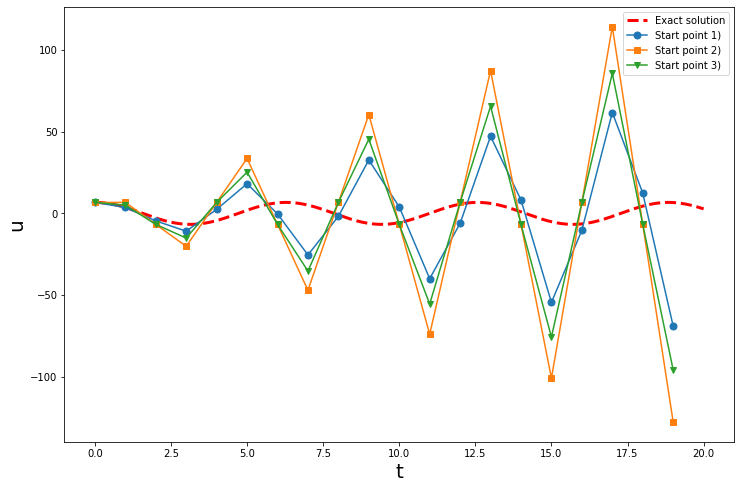

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(t_ex, u_ex, 'r--', linewidth=3, label='Exact solution')
plt.plot(t, U[0], 'o-', markersize=7, label='Start point 1)')
plt.plot(t, U[1], 's-', markersize=6, label='Start point 2)')
plt.plot(t, U[2], 'v-', markersize=6, label='Start point 3)')

plt.xlabel('t', fontsize=20)
plt.ylabel('u', fontsize=20)
plt.legend()

#### Локальная ошибка

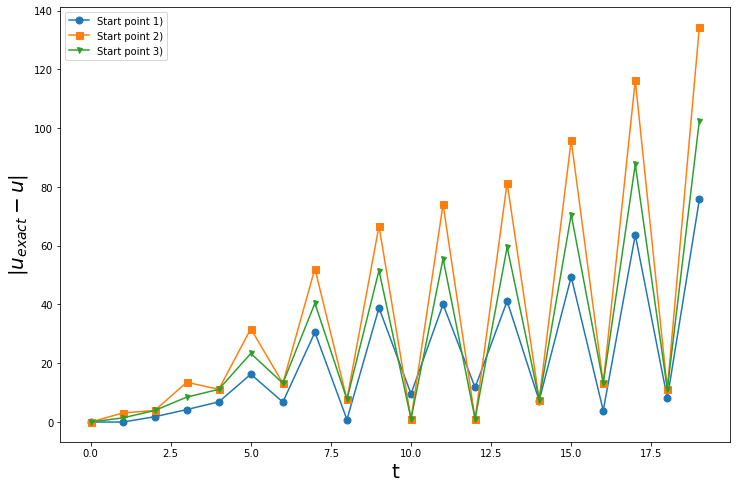

In [ ]:

plt.figure(figsize=(12,8))
U_ex = u0*np.cos(t)
plt.plot(t, abs(U[0]-U_ex), 'o-', markersize=7, label='Start point 1)')
plt.plot(t, abs(U[1]-U_ex), 's-', markersize=7, label='Start point 2)')
plt.plot(t, abs(U[2]-U_ex), 'v-', markersize=5, label='Start point 3)')

plt.xlabel('t', fontsize=20)
plt.ylabel(r'$|u_{exact}-u|$', fontsize=20)
plt.legend()

#### Интегральная ошибка

$$\epsilon(t_n) = \frac{\sum_{i=0}^{n} (u_{numeric}(t_i) - u_{exact}(t_i))^2}{\sum_{i=0}^{n}(u_{exact}(t_i))^2}$$

In [ ]:



def integral_error(t, u_num, u_ex):

    eps = np.zeros_like(t, dtype='float32')

    for i in range(1, t.shape[0]+1):
        eps[i-1] = np.sum((u_num[:i] - u_ex[:i])**2)/np.sum(u_ex[:i]**2)

    return eps

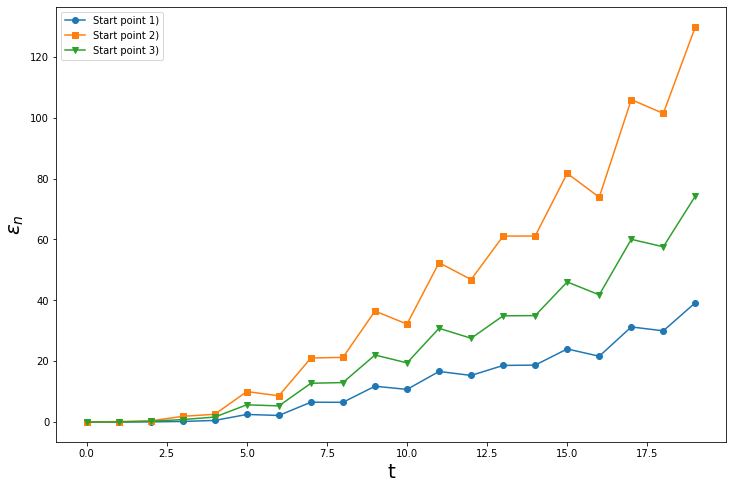

In [ ]:

plt.figure(figsize=(12,8))

plt.plot(t, integral_error(t, U[0], U_ex), '-o', label='Start point 1)')
plt.plot(t, integral_error(t, U[1], U_ex), '-s', label='Start point 2)')
plt.plot(t, integral_error(t, U[2], U_ex), '-v', label='Start point 3)')

plt.xlabel('t', fontsize=20)
plt.ylabel(r'$\epsilon_n$', fontsize=20)
plt.legend()

#### Зависимость ошибки от шага

In [ ]:
dT = [1, 0.5, 0.2]
U_dt = []
U_ex_dt = []
T = []

for dt_i in dT:

    u, v = LeapfrogSolver(u0, v0, u_start_2, v_start_2, dt_i, t_final)
    U_dt.append(u)

    t = np.arange(0, t_final, dt_i)
    T.append(t)

    u_ex = u0*np.cos(t)
    U_ex_dt.append(u_ex)

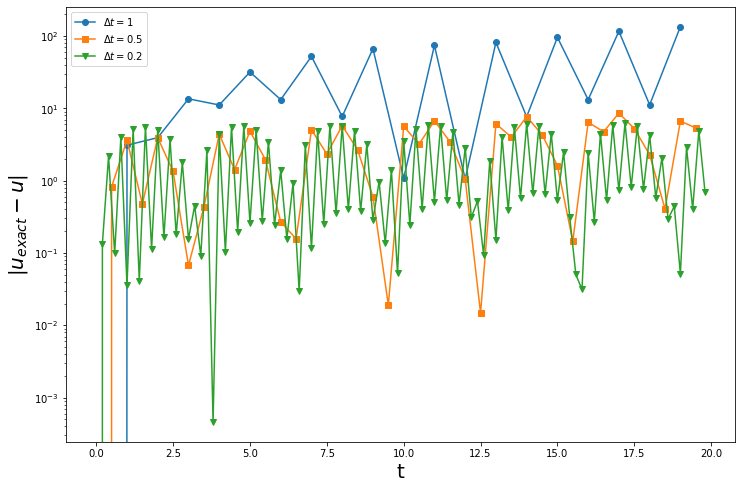

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(T[0], abs(U_dt[0]-U_ex_dt[0]), '-o', label=r'$\Delta t=1$')
plt.plot(T[1], abs(U_dt[1]-U_ex_dt[1]), '-s', label=r'$\Delta t=0.5$')
plt.plot(T[2], abs(U_dt[2]-U_ex_dt[2]), '-v', label=r'$\Delta t=0.2$')

plt.xlabel('t', fontsize=20)
plt.ylabel(r'$|u_{exact}-u|$', fontsize=20)
plt.yscale('log')
plt.legend()

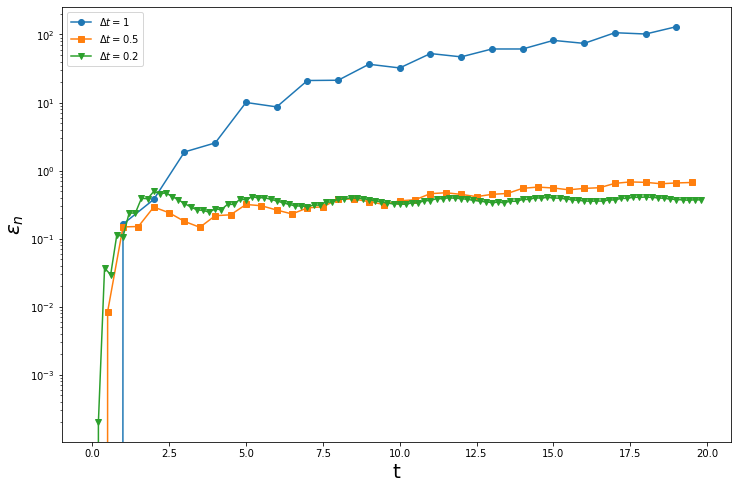

In [ ]:



plt.figure(figsize=(12,8))

plt.plot(T[0], integral_error(T[0], U_dt[0], U_ex_dt[0]), '-o', label=r'$\Delta t=1$')
plt.plot(T[1], integral_error(T[1], U_dt[1], U_ex_dt[1]), '-s', label=r'$\Delta t=0.5$')
plt.plot(T[2], integral_error(T[2], U_dt[2], U_ex_dt[2]), '-v', label=r'$\Delta t=0.2$')

plt.xlabel('t', fontsize=20)
plt.ylabel(r'$\epsilon_n$', fontsize=20)
plt.yscale('log')
plt.legend()